In [1]:
import basketball_ref_scraper as brs
from basketball_ref_scraper import teams
from basketball_ref_scraper import constants
from basketball_ref_scraper import players
from basketball_ref_scraper.constants import TEAM_TO_TEAM_ABBR
from basketball_ref_scraper.constants import MONTH_ABBR_TO_NUM
import lxml
import numpy as np

In [2]:
team = TEAM_TO_TEAM_ABBR["ATLANTA HAWKS"]
year = 2022
roster = brs.teams.get_roster(team, year)
roster.dropna()
roster.head()

,NUMBER,PLAYER,POS,HEIGHT,WEIGHT,BIRTH_DATE,NATIONALITY,EXPERIENCE,COLLEGE
0,5,Cat Barber,PG,6-2,190,1994-07-25,US,R,NC State
1,13,Bogdan Bogdanović,SG,6-6,220,1992-08-18,RS,4,NaN
2,45,Chaundee Brown Jr.,SG,6-5,215,1998-12-04,US,R,"Wake Forest, Michigan"
3,15,Clint Capela,C,6-10,240,1994-05-18,CH,7,NaN
4,20,John Collins,PF,6-9,235,1997-09-23,US,4,Wake Forest


In [4]:
try:
    from utils import get_player_suffix
    from lookup import lookup
except:
    from basketball_ref_scraper.utils import get_player_suffix
    from basketball_ref_scraper.lookup import lookup
    
player = "Russel Westbrick"
ask_matches = True
name = lookup(player, ask_matches)
print(player)
player = "Lebum James"
name = lookup(player, ask_matches)
print(player)

You searched for "Russel Westbrick"
1 result found.
Russel Westbrick
You searched for "Lebum James"
5 results found.
Lebum James


In [4]:
from basketball_ref_scraper import games

game = games.get_games(team, year)
game.head()

,DATE,YEAR,MONTH,DAY,START_ET,HOME,OPPONENT,OUTCOME,OVERTIME,POINTS_SCORED,OPPONENT_POINTS,CUMULATIVE_W,CUMULATIVE_L,STREAK
0,"Thu, Oct 21, 2021",2021,10,21,7:30p,True,DAL,W,False,113,87,1,0,W 1
1,"Sat, Oct 23, 2021",2021,10,23,6:00p,False,CLE,L,False,95,101,1,1,L 1
2,"Mon, Oct 25, 2021",2021,10,25,7:30p,True,DET,W,False,122,104,2,1,W 1
3,"Wed, Oct 27, 2021",2021,10,27,7:30p,False,NOP,W,False,102,99,3,1,W 2
4,"Thu, Oct 28, 2021",2021,10,28,7:00p,False,WAS,L,False,111,122,3,2,L 1


In [5]:
points = np.array([int(i) for i in game["POINTS_SCORED"].tolist()])
# Compute frequency and bins
frequency, bins = np.histogram(points, bins=40, range=[0, 200])

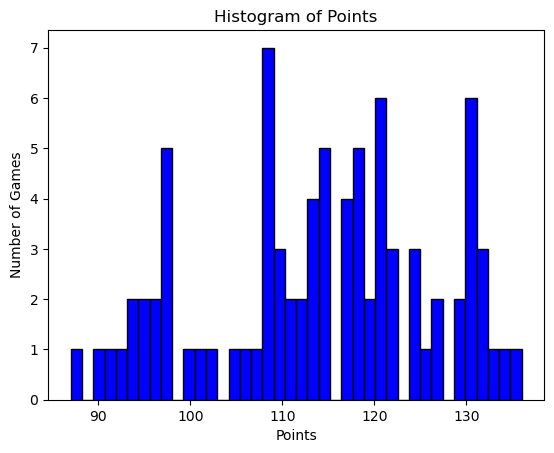

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# matplotlib histogram
plt.hist(points, color = 'blue', edgecolor = 'black',
         bins = int(40))

# Add labels
plt.title('Histogram of Points')
plt.xlabel('Points')
plt.ylabel('Number of Games')
plt.show()

In [7]:
import scipy
from scipy.stats import kurtosis
from scipy.stats import skew

print("Average is {}, variance is {}, skewness is {}, kurtosis is {}".format(np.average(points), np.var(points), skew(points), kurtosis(points)))

# https://en.wikipedia.org/wiki/Pearson_distribution

Average is 114.07142857142857, variance is 148.89965986394557, skewness is -0.2559131795367071, kurtosis is -0.796679657574249


In [8]:
from fitter import Fitter, get_common_distributions, get_distributions

f = Fitter(points)
f.fit()
f.summary()

c:\Users\jonat\anaconda3\envs\quant\lib\site-packages\scipy\integrate\_quadpack_py.py:1225: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  quad_r = quad(f, low, high, args=args, full_output=self.full_output,
c:\Users\jonat\anaconda3\envs\quant\lib\site-packages\scipy\integrate\_quadpack_py.py:1225: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  quad_r = quad(f, low, high, args=args, full_output=self.full_output,


,sumsquare_error,aic,bic,kl_div,ks_statistic,ks_pvalue
gausshyper,0.112090,802.461517,-529.433421,inf,0.077064,0.671726
argus,0.112211,805.298165,-542.635502,inf,0.085929,0.536016
beta,0.112224,801.558115,-538.194687,inf,0.080744,0.614761
johnsonsb,0.112250,803.450628,-538.175409,inf,0.078848,0.644094
genextreme,0.112588,821.576553,-542.353851,inf,0.072676,0.738904
